In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math
import random

In [2]:
def sigmoid(x,b):
    y=1.0/(1.0+sp.exp(-(x+b)))
    return y

In [3]:
w1,w2,w3=sp.symbols('w1 w2 w3')
b1,b2= sp.symbols('b1 b2')
x=sp.symbols('x')


In [4]:
def u(x):
    a1=sigmoid(w1*x,b1)
    N=a1*w2+b2
    return x*N


U=u(x)
du_dx=U.diff(x,1)


In [5]:
L=(du_dx+(U/5)-(sp.exp(-x/5)*sp.cos(x)))**2 
#Gradient
gw1,gw2=L.diff(w1),L.diff(w2)


gb1,gb2=L.diff(b1),L.diff(b2)


In [6]:
def Loss(W1,W2,B1,B2,X):
    return L.subs([(w1,W1),(w2,W2),(b1,B1),(b2,B2),(x,X)])


def LW1(W1,W2,B1,B2,X):
    return gw1.subs([(w1,W1),(w2,W2),(b1,B1),(b2,B2),(x,X)])

def LW2(W1,W2,B1,B2,X):
    return gw2.subs([(w1,W1),(w2,W2),(b1,B1),(b2,B2),(x,X)])


def LB1(W1,W2,B1,B2,X):
    return gb1.subs([(w1,W1),(w2,W2),(b1,B1),(b2,B2),(x,X)])

def LB2(W1,W2,B1,B2,X):
    return gb2.subs([(w1,W1),(w2,W2),(b1,B1),(b2,B2),(x,X)])

In [7]:
random.seed(1)
W1=random.random()
W2=random.random()

#Bias
B1=random.random()
B2=random.random()


In [8]:
X_value=np.linspace(0,1,20)
n=X_value.shape[0]


In [9]:
# Number of Epoch
epoch=200
#learning rate
l_rate = 0.2
Lss=[]
for i in range(epoch):
    S1,S2=0,0
    Bi1,Bi2=0,0
    Ls=0.0
    for X in X_value:
        Ls+=Loss(W1,W2,B1,B2,X)
        S1+= LW1(W1,W2,B1,B2,X)
        S2+= LW2(W1,W2,B1,B2,X)
        

        Bi1+= LB1(W1,W2,B1,B2,X)
        Bi2+= LB2(W1,W2,B1,B2,X)
        
    
    W1-=l_rate*(S1/n)
    W2-=l_rate*(S2/n)
    

    B1-=l_rate*(Bi1/n)
    B2-=l_rate*(Bi2/n)
    a=Ls/n
    Lss.append(a)
    if i>=1:
        if abs(Lss[-2]-Lss[-1]) <0.00001:
            break



In [10]:
def NN_U(xi):
    return U.subs([(w1,W1),(w2,W2),(b1,B1),(b2,B2),(x,xi)])

def act_U(xi):
   
    return math.exp(-xi/5)*(math.sin(xi))


X_test=np.linspace(0,1,13)

N=X_test.shape[0]

er=0
U_NN=[]
U_act=[]
for xi in X_test:
    U_NN.append(NN_U(xi))
    U_act.append(act_U(xi))
    er+=(NN_U(xi)-act_U(xi))**2
print('Mean square error:','%0.7f'%(er/N))



print('Weights:',(W1,W2))
print('Bias:',(B1,B2))



Mean square error: 0.0000327
Weights: (-1.04285571443650, 1.28345356424041)
Bias: (0.709525474405509, 0.151656425869594)


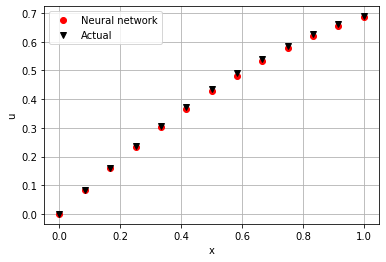

In [11]:
plt.plot(X_test,U_NN,'ro',label='Neural network')
plt.plot(X_test,U_act,'kv',label='Actual')
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
plt.legend()

At t=10 value of y is0.6892566148025364


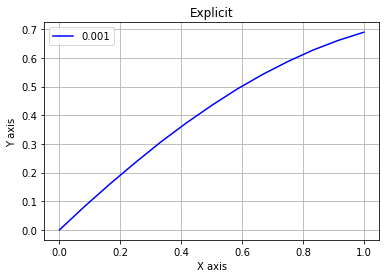

In [12]:
########################EXPLICIT###########################################
t=0
yin=0
dt=0.001
i=0
znew=0
T=[]
Y=[]
Mn1=[]
X_test=np.linspace(0,1,13)
for n in X_test:
    if n!=0:
        Mn1.append(znew)
    while(t<n):
        if i==0:
            zn=0
            t=0
        else:
            zn=znew
        f=(-zn/5)+(math.exp(-t/5)*(math.cos(t)))    
        znew=zn+(dt*f)
        mn1=znew
        t=t+dt
        i=i+1
Mn1.append(znew)
print("At t=10 value of y is"+str(znew))
plt.plot(X_test,Mn1,'b',label=str(dt))
plt.legend()
plt.title('Explicit')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.grid()
plt.show()
    

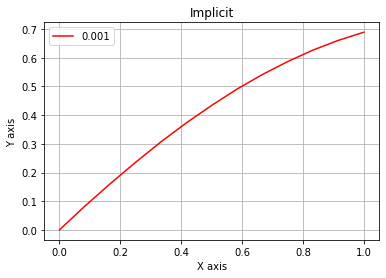

In [13]:
############################FULL_IMPLICIT#######################################
i=0
yin=0
K1=[yin]
T2=[0]
t=0
yp=yin
yn1=yin
dt=0.001
Mn2=[]
X_test=np.linspace(0,1,13)
for n in X_test:
    if n!=0:
        Mn2.append(yp)
    while(t<n):
        t=t+dt
        ynl=yp
        for i in range(20):
            ynew=yn1-(((yn1+dt*((yn1/5)-(math.exp(-t/5)*(math.cos(t)))))-yp)/(1+dt*((1/5)-(math.exp(-t/5)*(math.cos(t))))))
            yn1=ynew

        yp=ynew
        K1.append(ynew)    
        T2.append(t)
Mn2.append(yp)
plt.plot(X_test,Mn2,'r',label=str(dt))
plt.legend()
plt.title('Implicit')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.grid()
plt.show()

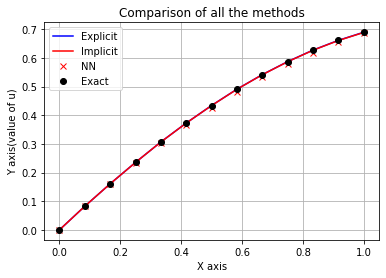

In [14]:
plt.plot(X_test,Mn1,'b',label="Explicit")
plt.plot(X_test,Mn2,'r',label="Implicit")
plt.plot(X_test,U_NN,'rx',label="NN")
plt.plot(X_test,U_act,'ko',label="Exact")
plt.legend()
plt.title('Comparison of all the methods')
plt.xlabel('X axis')
plt.ylabel('Y axis(value of u)')
plt.grid()
plt.show()